In [ ]:
import pymc3 as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Данные: 1000 подбрасываний монеты, 600 орлов
observed_data = np.concatenate([np.ones(600), np.zeros(400)])

In [24]:
with pm.Model() as model:
    # Априорное распределение для вероятности орла
    p = pm.Beta("p", alpha=2, beta=2)
    
    # Правдаподобие
    y = pm.Bernoulli("y", p, observed=observed_data)
    
    # Выборка из апостериорного распределения
    trace = pm.sample(1000, return_inferencedata=False)
    
    # Генерация предсказаний
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"])

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


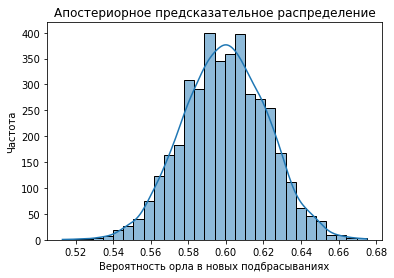

In [25]:
sns.histplot(np.mean(posterior_predictive["y"], axis=1), bins=30, kde=True)
plt.xlabel("Вероятность орла в новых подбрасываниях")
plt.ylabel("Частота")
plt.title("Апостериорное предсказательное распределение")
plt.show()

# Вывод

Модель корректно оценила вероятность выпадания орла, опираясь на наблюдаемые данные.  
При будущих подбрасываниях этой же монеты можно ожидать, что орел выпадет ~60 процентов  
с некоторой дисперсией, описываемой полученным апостериорным распределением.